In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import numpy as np
import seaborn as sns

In this project I will acompare the NYC Air B&B market in the years 2019 and 2024 using the data available on https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data for 2019 and https://www.kaggle.com/datasets/vrindakallu/new-york-dataset for 2024 to see how the market changed in 5 years mainly due to the 'Local Law 18' being passed 09/05/2023. NYC can roughly be separated in 5 neighbourhood groups: Bronx, Brooklyn, Manhatan, Queens and Staten Island. I will do the analysis for each of the 5 neighbourhood groups.

In [207]:
#reading the csv files for each year and filtering the data slightly by removing the highest and lowest values in the graphs. 
# This will give us a better understanding of the typical range of prices in the city
df_2019 = pd.read_csv('AB_NYC_2019.csv')
df_2019 = df_2019.sort_values(by=['neighbourhood_group', 'price'])
lower_bound = df_2019['price'].quantile(0.025)
upper_bound = df_2019['price'].quantile(0.975)
df_2019 = df_2019[(df_2019['price'] >= lower_bound) & (df_2019['price'] <= upper_bound)]
df_2019_bar = df_2019.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df_2019_bar = df_2019_bar.unstack()

df_2024 = pd.read_csv('new_york_listings_2024.csv')
df_2024 = df_2024.sort_values(by=['neighbourhood_group', 'price'])
lower_bound = df_2024['price'].quantile(0.025)
upper_bound = df_2024['price'].quantile(0.975)
lower_bound = df_2024['price'].quantile(0.025)
upper_bound = df_2024['price'].quantile(0.975)
df_2024 = df_2024[(df_2024['room_type'] != 'Hotel room') & (df_2024['price'] >= lower_bound) & (df_2024['price'] <= upper_bound)]


neighbourhood_group
Manhattan        20776
Brooklyn         19391
Queens            5386
Bronx             1000
Staten Island      334
Name: count, dtype: int64
neighbourhood_group
Manhattan        7499
Brooklyn         7399
Queens           3544
Bronx             919
Staten Island     283
Name: count, dtype: int64
['Bronx', 'Broooklyn', 'Manhatan', 'Queens', 'Staten Island']


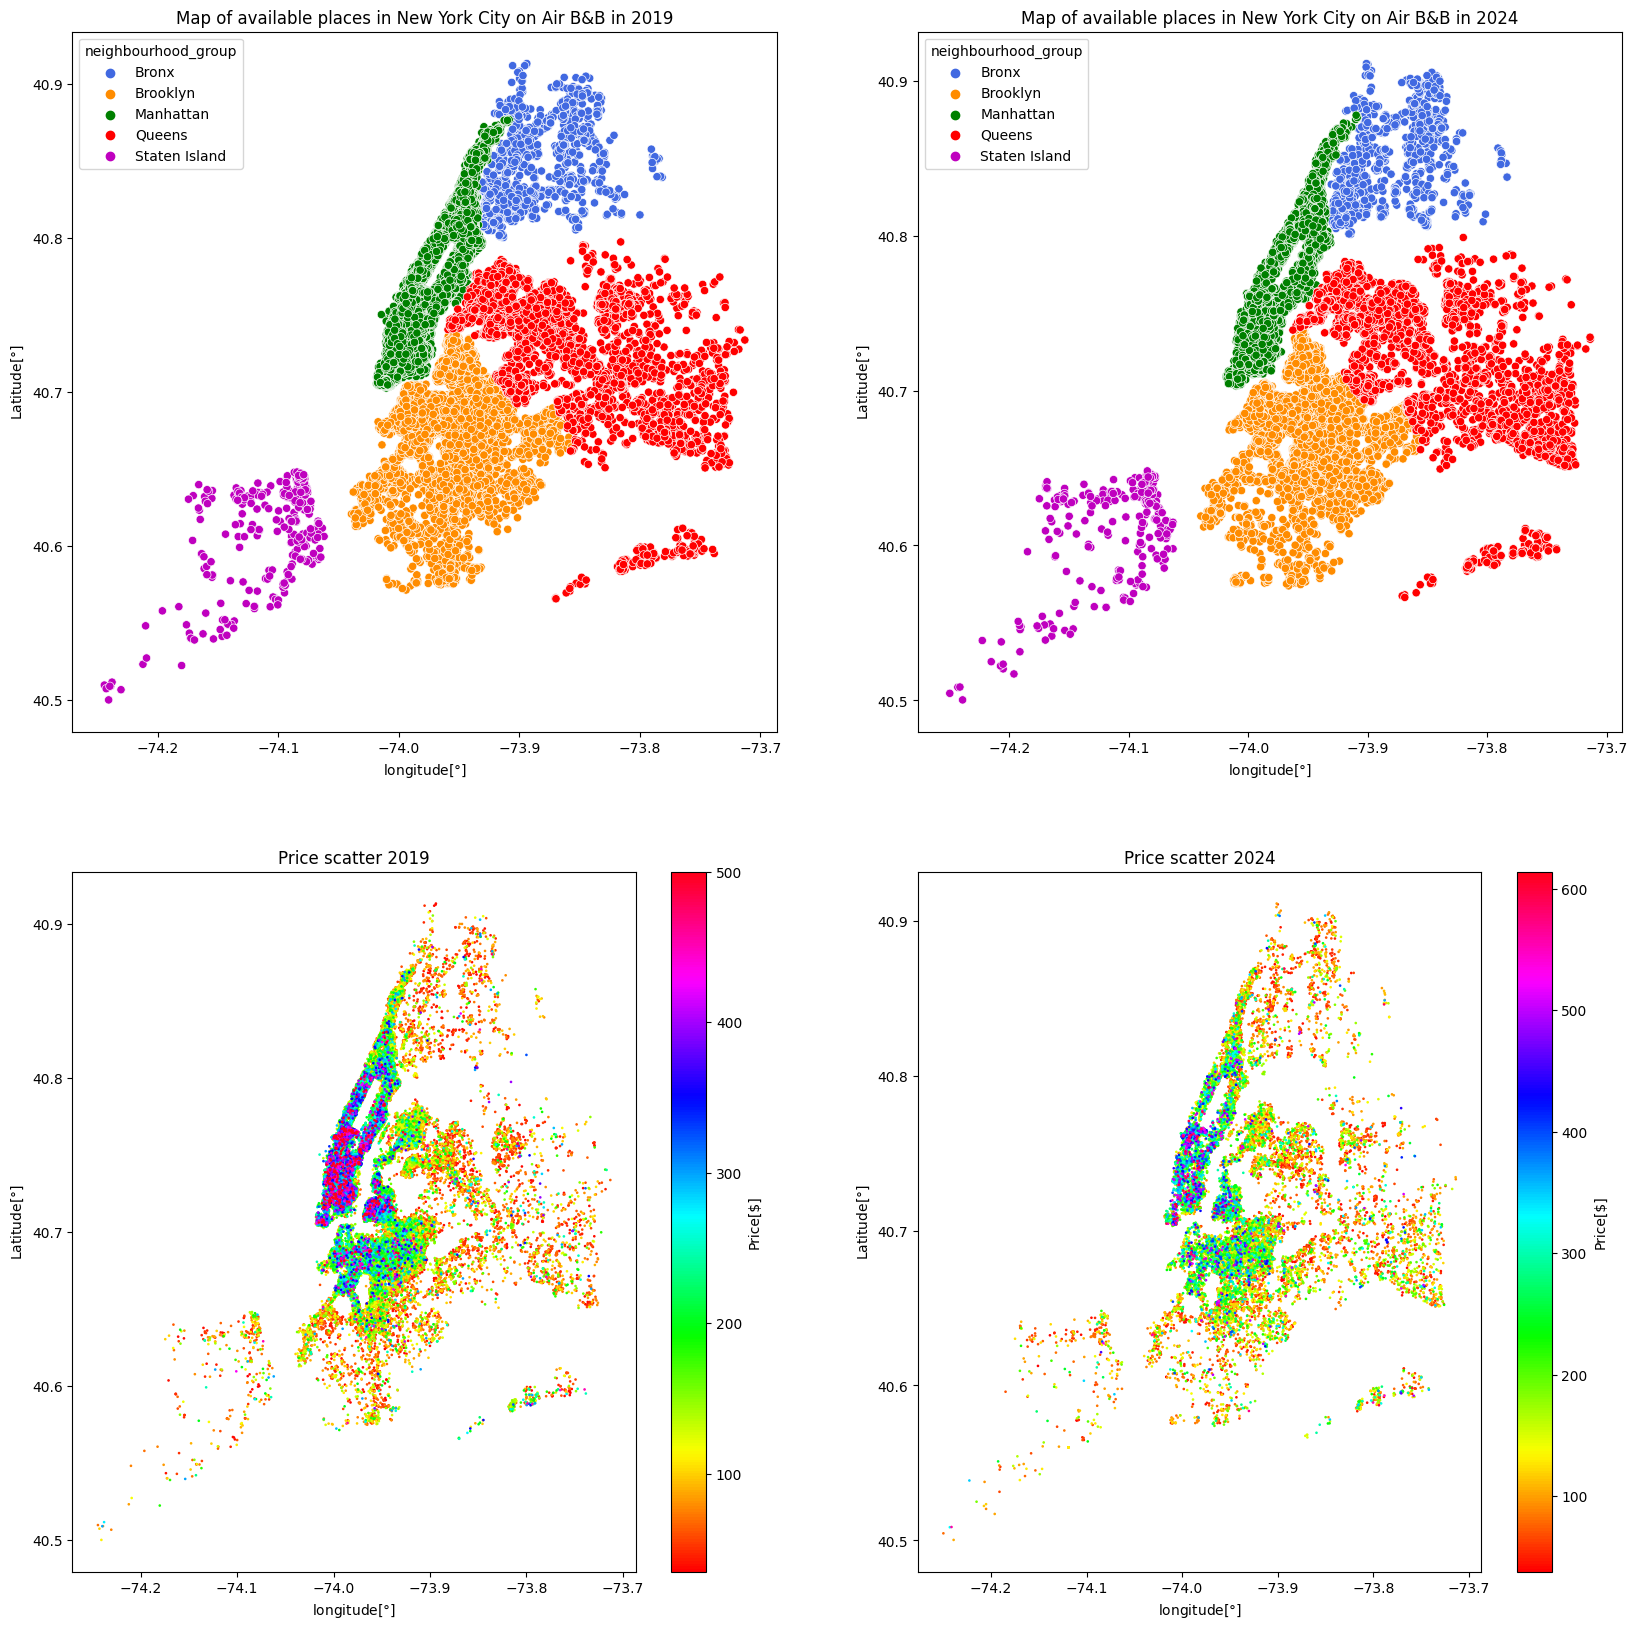

In [208]:
#drawing amap of NYC(first row) and a price scatter (second row) for 2019(first column) and 2024(second column)
colors = ['royalblue', 'darkorange', 'g', 'r', 'm']
counts_2019 = df_2019['neighbourhood_group'].value_counts()
print(counts_2019)
counts_2024 = df_2024['neighbourhood_group'].value_counts()
print(counts_2024)
neighbourhood_groups = ['Bronx','Broooklyn', 'Manhatan', 'Queens', 'Staten Island']
print(neighbourhood_groups)
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (20,20))

sns.scatterplot(data=df_2019, x= 'longitude', y='latitude', hue='neighbourhood_group',palette=colors,ax=axes[0,0])


axes[0,0].set_xlabel('longitude[$\degree$]')
axes[0,0].set_ylabel('Latitude[$\degree$]')
axes[0,0].set_title('Map of available places in New York City on Air B&B in 2019')

sns.scatterplot(data=df_2024, x= 'longitude', y='latitude', hue='neighbourhood_group',palette=colors,ax=axes[0,1])

axes[0,1].set_xlabel('longitude[$\degree$]')
axes[0,1].set_ylabel('Latitude[$\degree$]')
axes[0,1].set_title('Map of available places in New York City on Air B&B in 2024')

graf_1 = axes[1,0].scatter(data= df_2019, x = 'longitude', y='latitude', c=df_2019['price'], cmap=plt.get_cmap('hsv'), s=0.8)
axes[1,0].set_title('Price scatter 2019')
axes[1,0].set_xlabel('longitude[$\degree$]')
axes[1,0].set_ylabel('Latitude[$\degree$]')
cbar = plt.colorbar(graf_1)
cbar.set_label('Price[$]')

graf_2 = axes[1,1].scatter(data= df_2024, x = 'longitude', y='latitude', c=df_2024['price'], cmap=plt.get_cmap('hsv'), s=0.8)
axes[1,1].set_title('Price scatter 2024')
axes[1,1].set_xlabel('longitude[$\degree$]')
axes[1,1].set_ylabel('Latitude[$\degree$]')
cbar = plt.colorbar(graf_2)
cbar.set_label('Price[$]')






Text(0.5, 1.0, '2024')

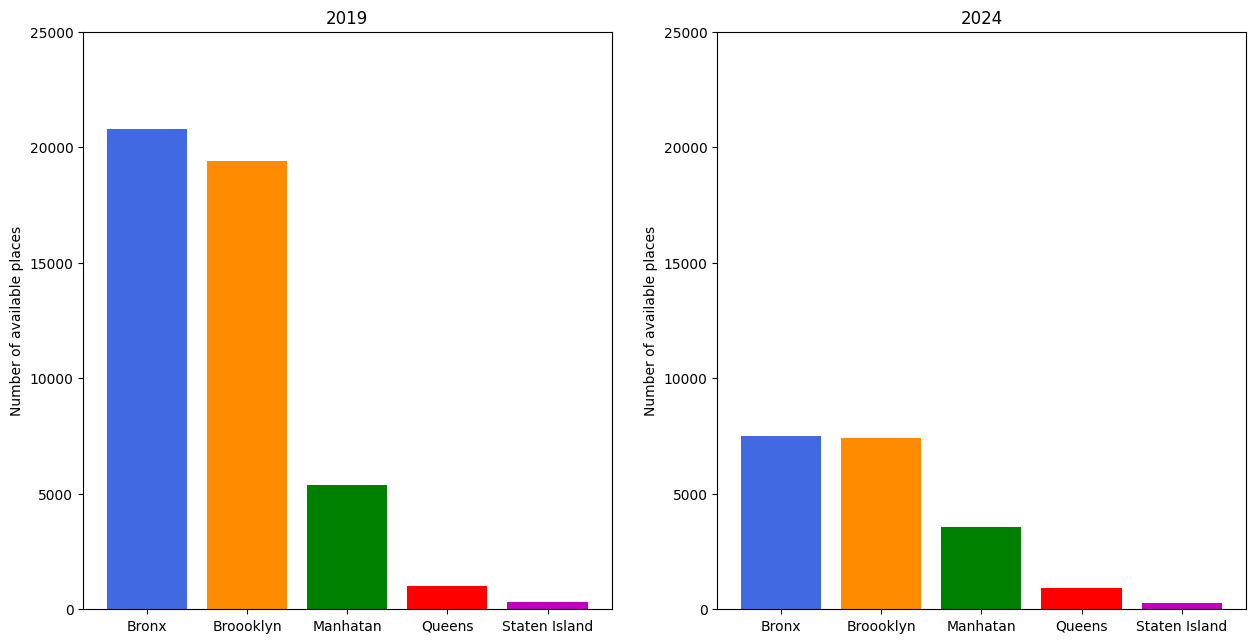

In [209]:
#drawing a bar graph for 2019 (left) and 2024(right)
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (15,7.5))

axes[0].bar(neighbourhood_groups,counts_2019, color = colors)
axes[0].set_ylabel('Number of available places')
axes[0].set_ylim((0,25000))
axes[0].set_title('2019')

axes[1].bar(neighbourhood_groups,counts_2024, color = colors)
axes[1].set_ylabel('Number of available places')
axes[1].set_ylim((0,25000))
axes[1].set_title('2024')



Difference between number of rooms for each type and each neighbourhood 
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                             15           -74          -22
Brooklyn                       -5326         -6502         -164
Manhattan                      -7533         -5366         -378
Queens                          -503         -1289          -50
Staten Island                    -14           -37            0


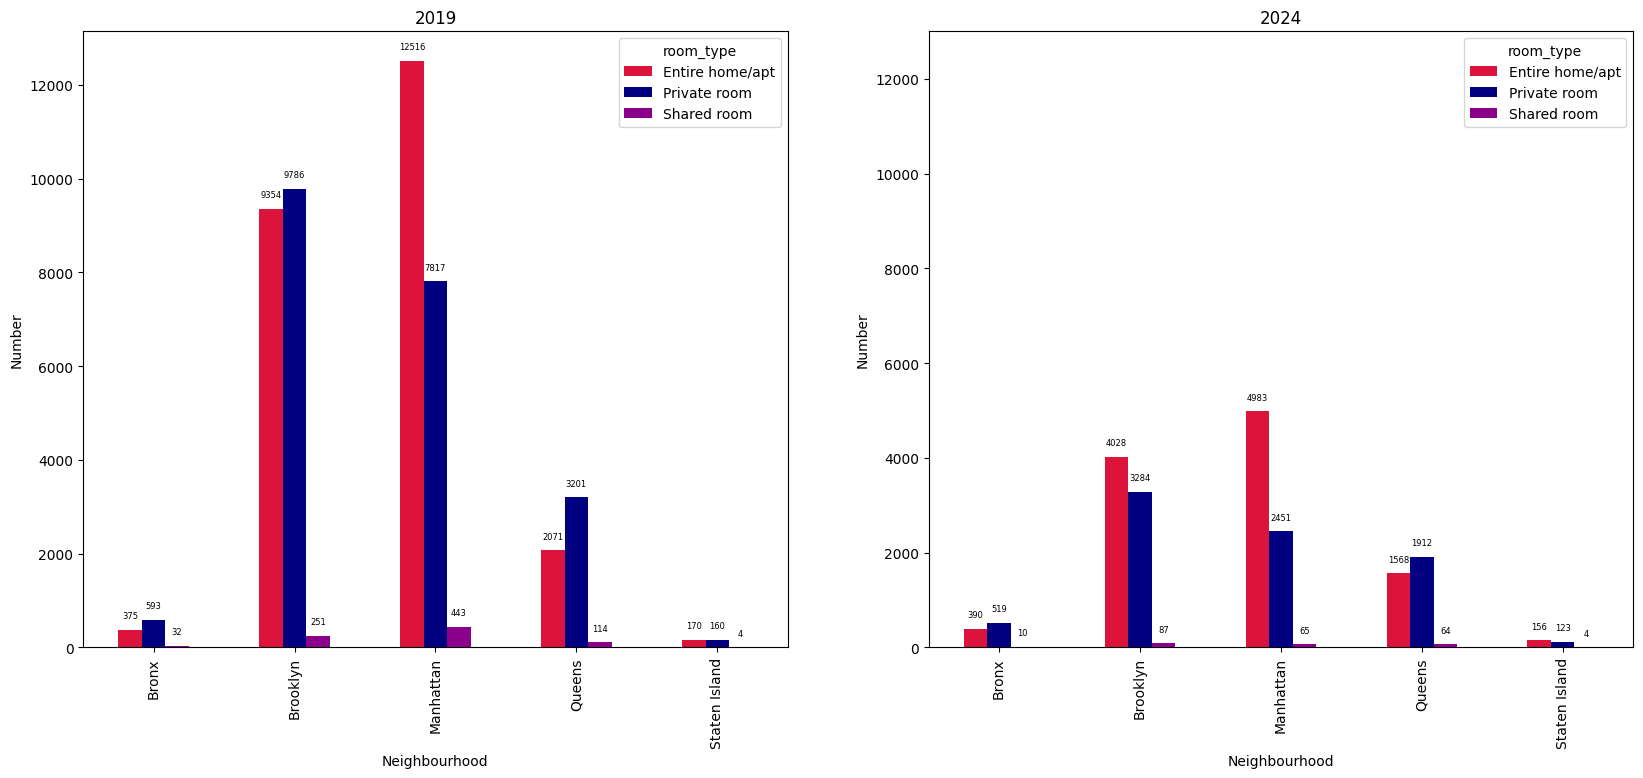

In [214]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (15,7.5))

room_counts_2019 = df_2019.groupby(['neighbourhood_group','room_type']).size().unstack()
room_counts_2024 = df_2024.groupby(['neighbourhood_group','room_type']).size().unstack()

room_counts_2019.plot.bar(legend=True, figsize=(20,8), xlabel='Neighbourhood', ylabel ='Number',ax=axes[0], color= ['crimson','navy','darkmagenta'],title='2019')
room_counts_2024.plot.bar(legend=True, figsize=(20,8), xlabel='Neighbourhood', ylabel ='Number',ax=axes[1], color= ['crimson', 'navy','darkmagenta'], title='2024')

plt.ylim((0,13000))
for p in axes[0].patches:
    axes[0].annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)
for p in axes[1].patches:
    axes[1].annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)



difference = room_counts_2024 - room_counts_2019
print('Difference between number of rooms for each type and each neighbourhood', '\n',difference)

We can see that the number of available places has reduced drastically. This is because of the 'Local Law 18', which came into force on 09/05/2023, is so strict it doesn’t just limit how Airbnb operates in the city—it almost bans it entirely for many guests and hosts. From now on, all short-term rental hosts in New York must register with the city, and only those who live in the place they’re renting—and are present when someone is staying—can qualify. And people can only have two guests. More on the law can be read on https://www.wired.com/story/airbnb-ban-new-york-city/.

Text(0.5, 1.0, 'Available places ratio per neighbourhood group for 2024')

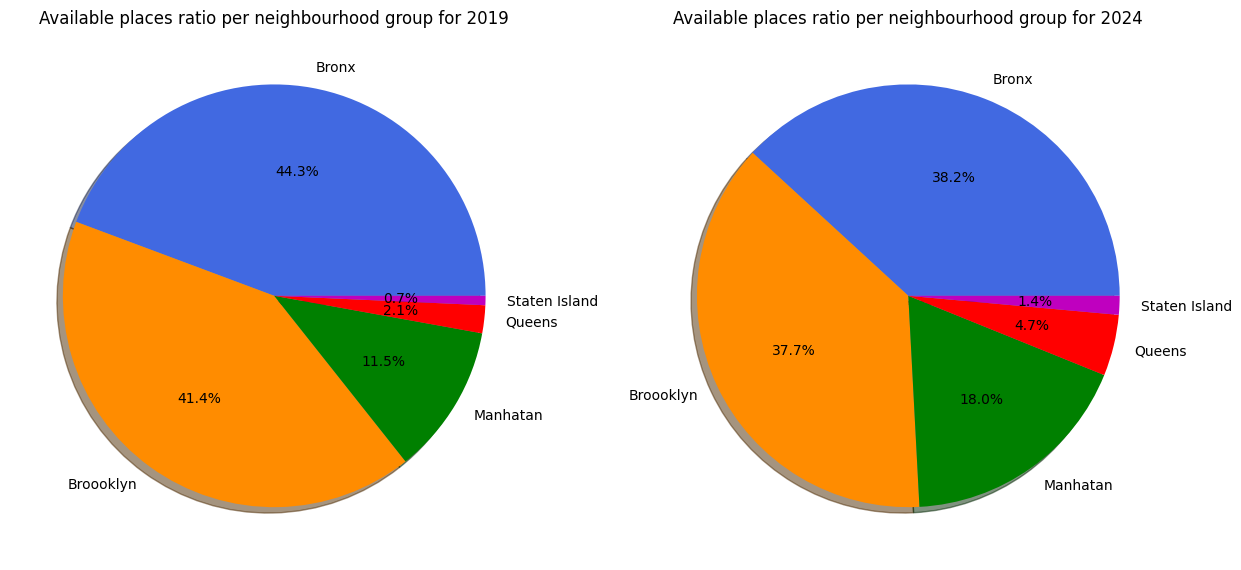

In [211]:
#drawing a pie chart for each year
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (15,7.5))

axes[0].pie(counts_2019, labels=neighbourhood_groups, colors = colors, shadow=True,autopct='%1.1f%%')
axes[0].set_title('Available places ratio per neighbourhood group for 2019')

axes[1].pie(counts_2024, labels=neighbourhood_groups, colors = colors, shadow=True,autopct='%1.1f%%')
axes[1].set_title('Available places ratio per neighbourhood group for 2024')

Table of price differences between 2024 and 2019 for each neighbourhood group and room type: 
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                      26.304923     14.982324    51.681250
Brooklyn                   28.462525     27.770437    72.619636
Manhattan                  -2.260878     24.512041    18.552283
Queens                     24.483669     22.666286    27.996711
Staten Island              15.017270     20.478303    62.500000


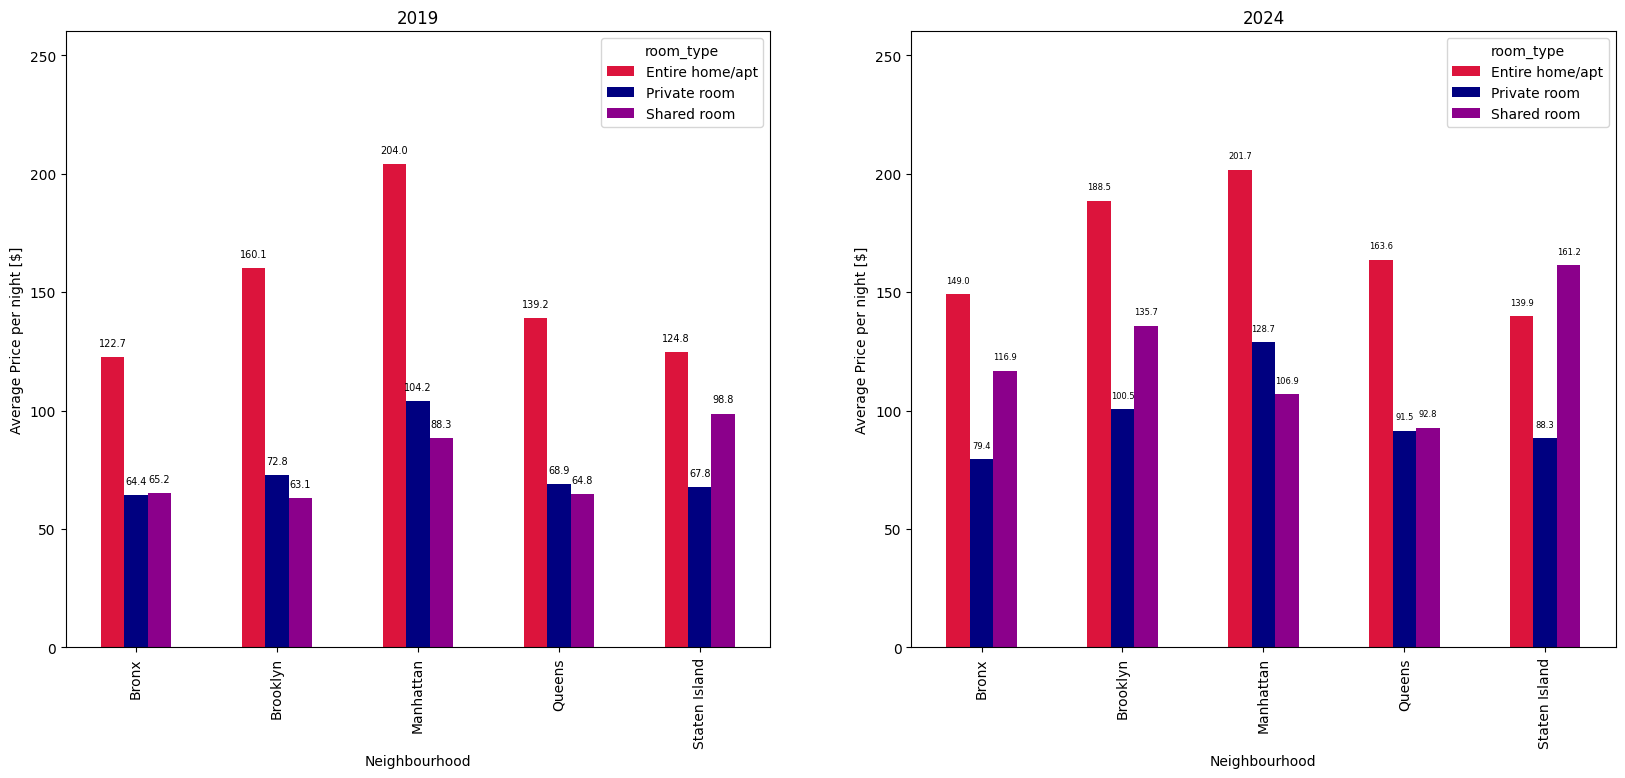

In [212]:
#draw a bar plot grouping the data by neighbourhood and type of room for each year
df_2019_bar = df_2019.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df_2019_bar = df_2019_bar.unstack()

df_2024_bar = df_2024.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df_2024_bar = df_2024_bar.unstack()

fig, axes = plt.subplots(nrows=1,ncols=2)
df_2019_bar.plot.bar(legend=True, figsize=(20,8), xlabel='Neighbourhood', ylabel ='Average Price per night [$]',ax=axes[0], color= ['crimson','navy','darkmagenta'])
df_2024_bar.plot.bar(legend=True, figsize=(20,8), xlabel='Neighbourhood', ylabel ='Average Price per night [$]',ax=axes[1], color= ['crimson', 'navy','darkmagenta'])

for p in axes[0].patches:
    axes[0].annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)
for p in axes[1].patches:
    axes[1].annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)
    
axes[0].set_ylim((0,260))
axes[0].set_title('2019')
axes[1].set_ylim((0,260))
axes[1].set_title('2024')


difference = df_2024_bar - df_2019_bar
print('Table of price differences between 2024 and 2019 for each neighbourhood group and room type:', '\n',difference)

C:\Users\Aleš\AppData\Local\Temp\ipykernel_9640\1732709998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heat['neighbourhood'] = df_heat['neighbourhood'].factorize()[0]
C:\Users\Aleš\AppData\Local\Temp\ipykernel_9640\1732709998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heat['neighbourhood_group'] = df_heat['neighbourhood_group'].factorize()[0]
C:\Users\Aleš\AppData\Local\Temp\ipykernel_9640\1732709998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Text(0.5, 1.0, 'Corelation Matrix 2024')

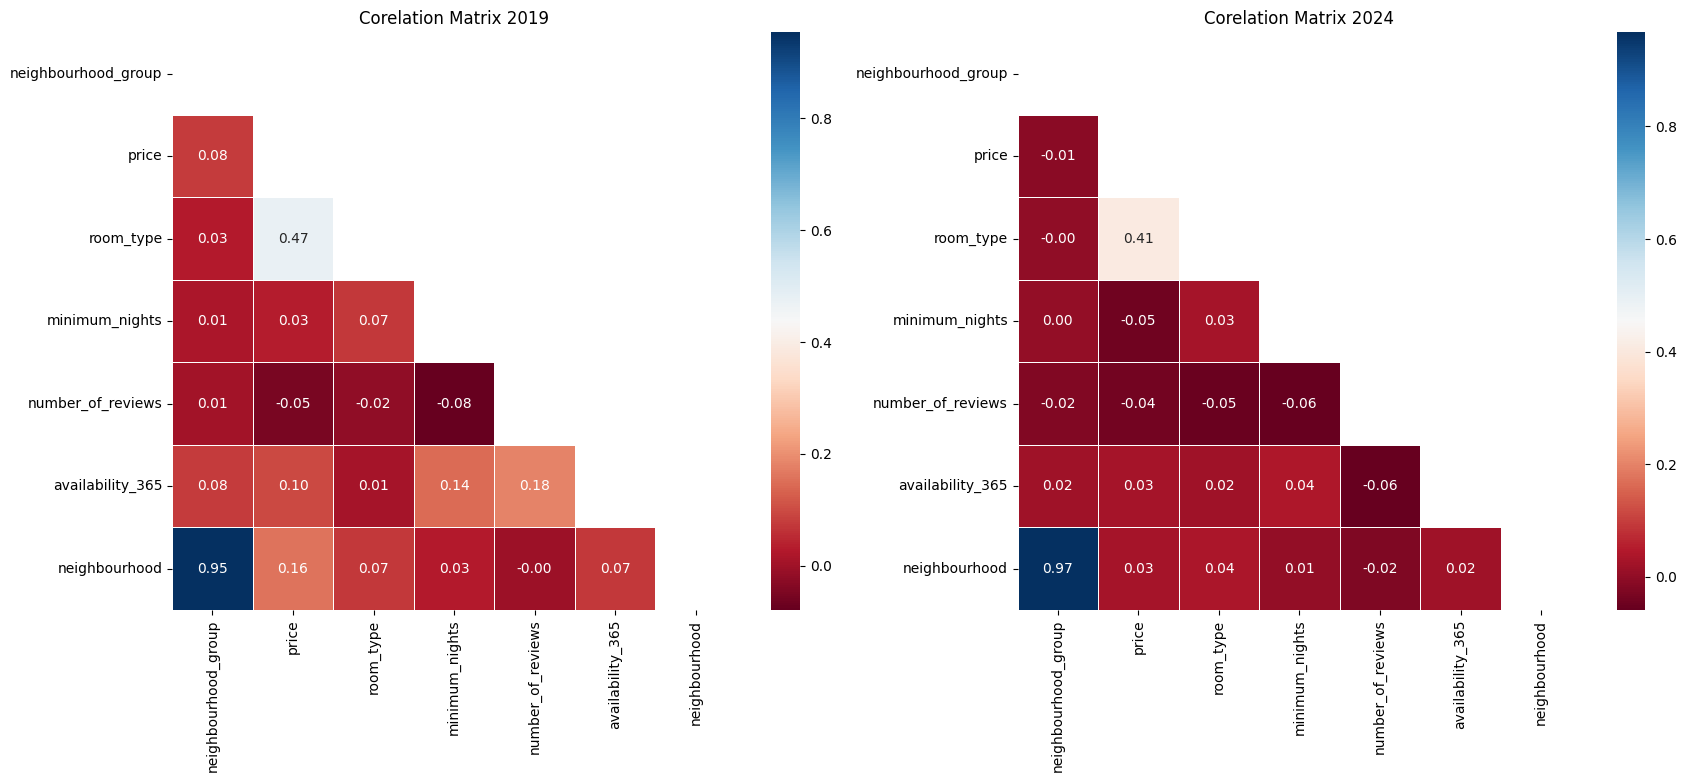

In [213]:
#let's draw a heatmap to see the correlations for 2019
df_heat = df_2019[['neighbourhood_group', 'price', 'room_type','minimum_nights', 'number_of_reviews','availability_365', 'neighbourhood']] #first we only select the columns we are interested in

df_heat['neighbourhood'] = df_heat['neighbourhood'].factorize()[0]
df_heat['neighbourhood_group'] = df_heat['neighbourhood_group'].factorize()[0]
df_heat['room_type'] = df_heat['room_type'].factorize()[0] #now we have to asign numbers to neighbourhood names
corr = df_heat.corr()
    
mask = np.triu(np.ones_like(corr))

fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (20,7.5))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', cmap = 'RdBu', linewidths = .5, ax=axes[0])

axes[0].set_title('Corelation Matrix 2019')


df_heat = df_2024[['neighbourhood_group', 'price', 'room_type','minimum_nights', 'number_of_reviews','availability_365', 'neighbourhood']] #first we only select the columns we are interested in

df_heat['neighbourhood'] = df_heat['neighbourhood'].factorize()[0]
df_heat['neighbourhood_group'] = df_heat['neighbourhood_group'].factorize()[0]
df_heat['room_type'] = df_heat['room_type'].factorize()[0] #now we have to asign numbers to neighbourhood names
corr = df_heat.corr()
    
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', cmap = 'RdBu', linewidths = .5, ax=axes[1])

axes[1].set_title('Corelation Matrix 2024')


